# 08. La primera mejora (modificación de umbral de corte)

## Cambiando el umbral del corte

$$\Large  4000 b - 200 a \ge 0 \\\  $$

                        Dividimos por 200

$$\Large  \frac{4000 b}{200} - \frac{200 a}{200} \ge 0 \\\  $$

$$\Large  20 b - a \ge 0 \\\ $$

$$\Large  20 b  \ge  a \\\  $$

                        Dividimos por a+b

$$\Large 20 \frac{b}{a+b} - \frac{a}{a+b} \ge 0 \\\ $$

                        Expresamos b/(a+b) y a/(a+b) como probabilidades

$$\Large 20 p(SI) - p(NO) \ge 0 \\\ $$

                        Reemplazamos p(NO) por (1 - p(SI))

$$\Large 20 p(SI) - (1-p(SI)) \ge 0 \\\ $$

$$\Large 20 p(SI) - 1 + p(SI) \ge 0 \\\ $$

$$\Large 21 p(SI) \ge 1 \\\ $$

$$\Large p(SI) \ge \frac{1}{21} \\\ $$

$$\Large p(SI) \ge 0.047  \Rightarrow  p(NO) \lt 0.953 $$

## Importamos paquetes necesarios

In [12]:
import pandas as pd
import numpy as np
import pydotplus

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image  

import graphviz_tools as agt
import mlflow_utils as a_mlflow_u
import tree_utils as atu

## Cargamos nuestros dataset

In [13]:
file_cervezas_unicas_resumen_valores_con_clase_training = 'dataset/cervezas_unicas_resumen_valores_con_clase_train.csv'
file_cervezas_unicas_resumen_valores_con_clase_testing = 'dataset/cervezas_unicas_resumen_valores_con_clase_test.csv'

campos = ['beer_abv', 'review_aroma', 'review_appearance', 'review_taste', 'review_overall', 'review_palate', 'es_popular']

df_training_validacion = pd.read_csv(file_cervezas_unicas_resumen_valores_con_clase_training)
df_testing = pd.read_csv(file_cervezas_unicas_resumen_valores_con_clase_testing)

df_training_validacion = df_training_validacion.loc[:, campos]
df_testing = df_testing.loc[:, campos]

df_training_validacion.head()

,beer_abv,review_aroma,review_appearance,review_taste,review_overall,review_palate,es_popular
0,6.0,3.564000,3.736000,3.592000,3.776000,3.620000,NO
1,4.5,2.608108,3.351351,2.743243,2.945946,3.054054,NO
2,4.4,3.727273,3.727273,3.545455,3.545455,3.545455,NO
3,7.5,3.750000,3.500000,3.750000,3.750000,4.000000,NO
4,7.8,2.500000,3.500000,3.500000,3.500000,3.500000,NO


## Separamos en training y validacion

In [14]:
random_state = 1
test_size = 0.3

atributos = ['beer_abv', 'review_aroma', 'review_appearance', 'review_taste', 'review_overall', 'review_palate']
clase = ['es_popular']

Y_df_training_validacion = df_training_validacion.loc[:, clase]
df_training_validacion = df_training_validacion.loc[:, atributos]

X_train, X_validacion, Y_train, Y_validacion = train_test_split(
    df_training_validacion, 
    Y_df_training_validacion, 
    test_size=test_size, 
    random_state=random_state
)

### Tambien abrimos en X e Y el dataset de testing

In [15]:
X_testing = df_testing.loc[:, atributos]
Y_testing = df_testing.loc[:, clase]

## Generamos nuestro primer modelo

In [16]:
max_depth = 4
criterion='gini'
clf = DecisionTreeClassifier(
            criterion = criterion,
            max_depth=max_depth,
            random_state=1
        )
_ = clf.fit(X_train, Y_train)


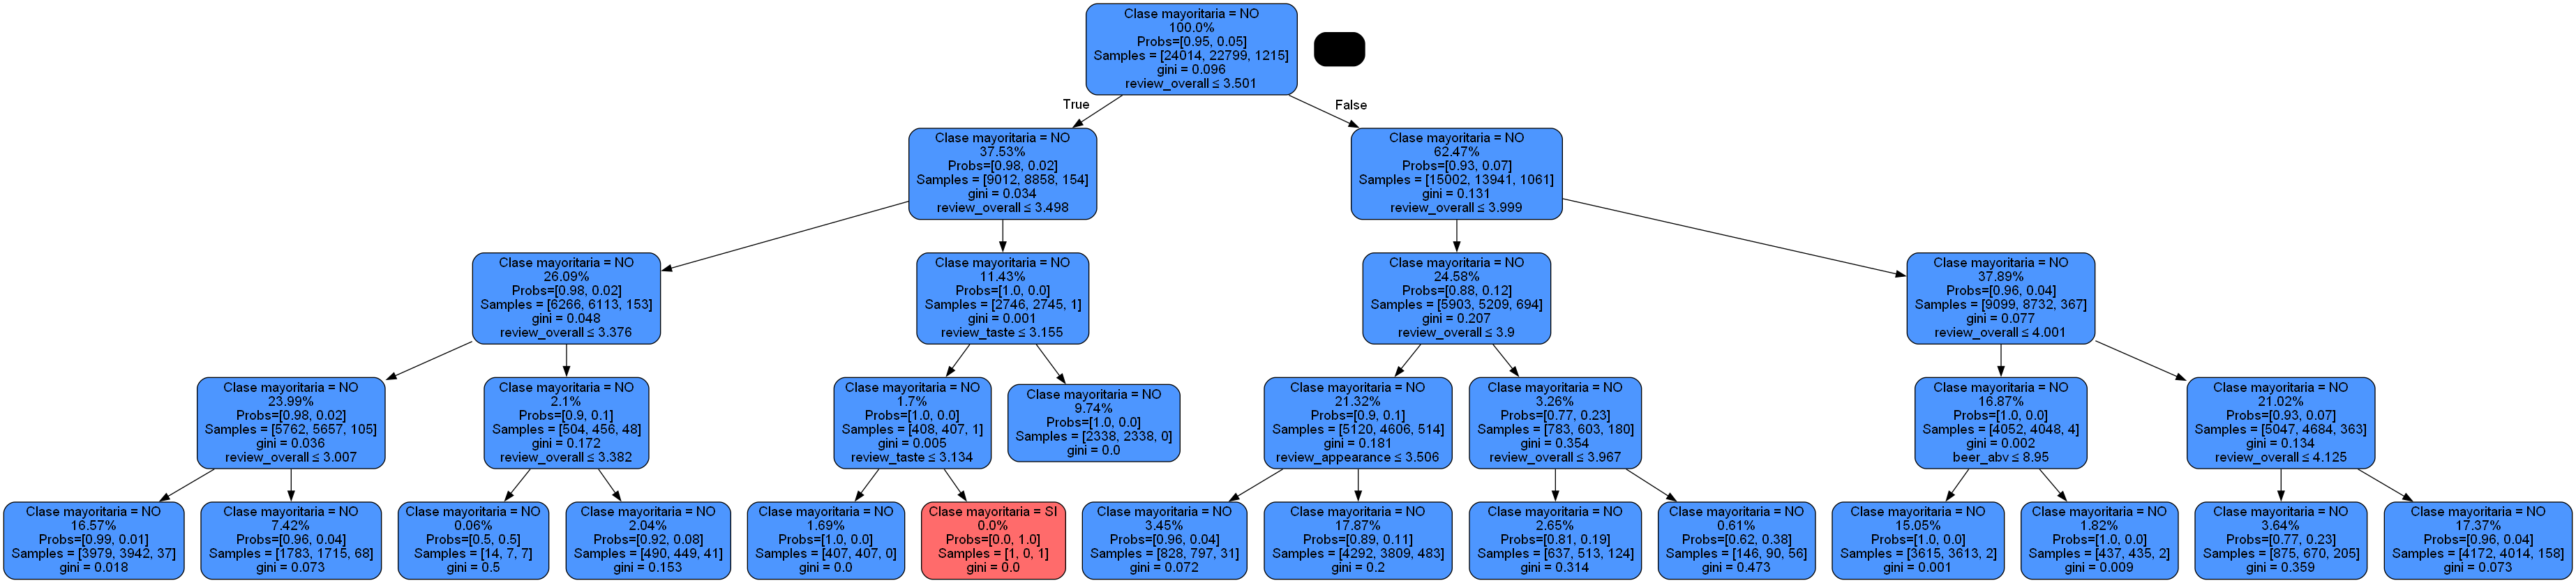

In [17]:
dot_data_value = agt.crear_arbol(clf, negative_class = 'NO', positive_class = 'SI', umbral = 0.5)

graph = pydotplus.graph_from_dot_data(dot_data_value)  
graph.set_size('"50,50"')
Image(graph.create_png())

### Probamos un nuevo umbral de corte

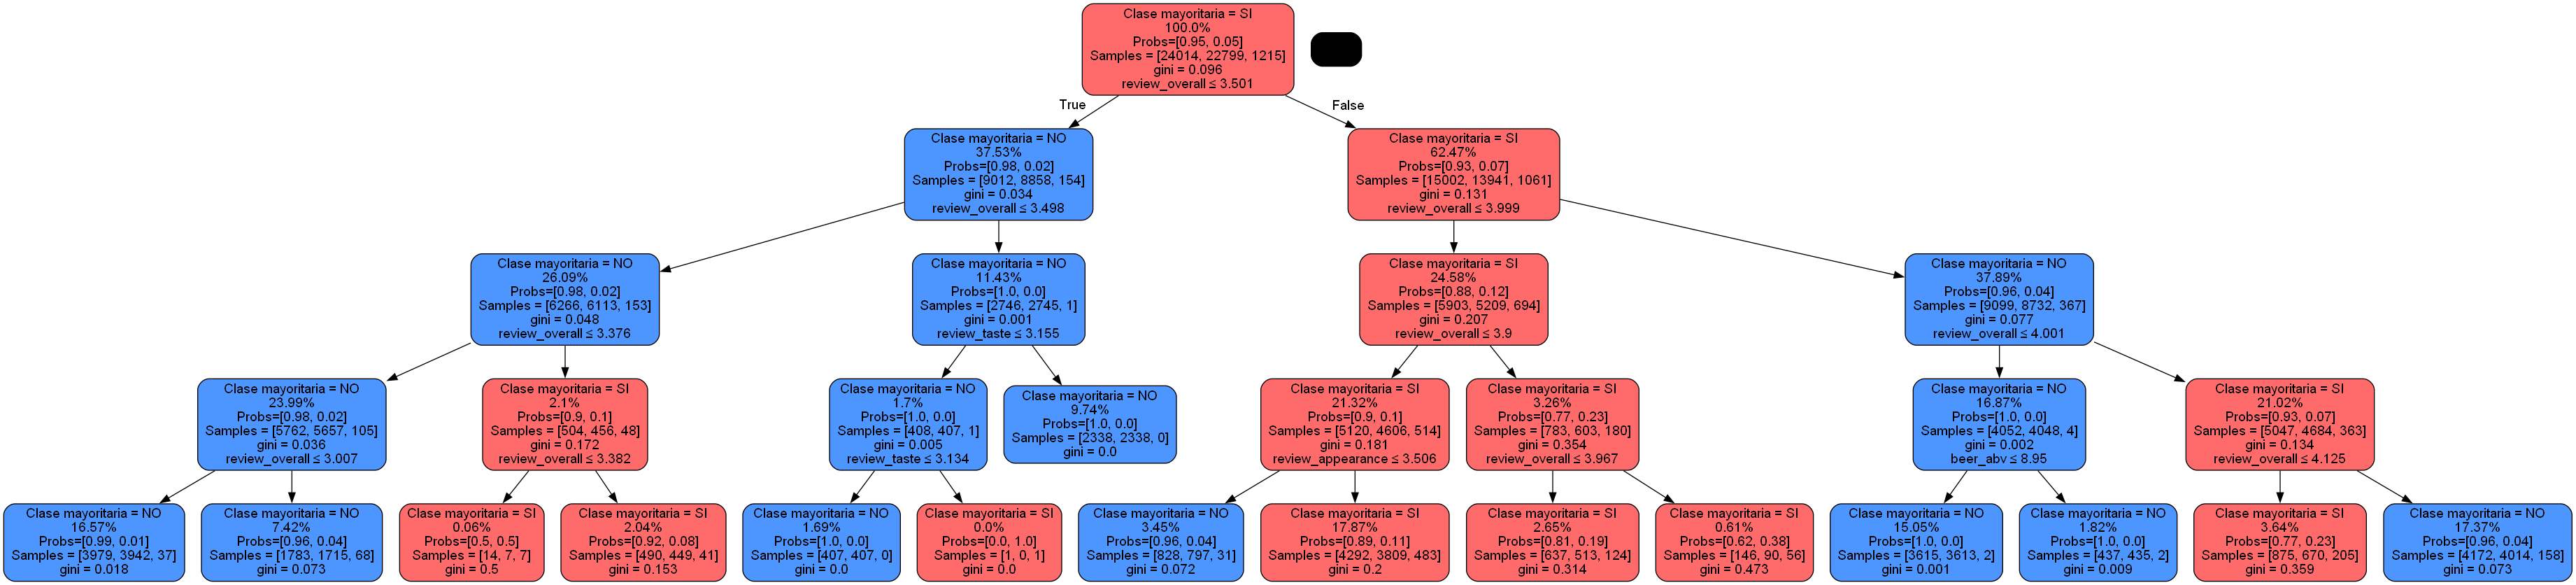

In [18]:
dot_data_value = agt.crear_arbol(clf, negative_class = 'NO', positive_class = 'SI', umbral = 0.953)

graph = pydotplus.graph_from_dot_data(dot_data_value)  
graph.set_size('"50,50"')
graph.write_png('img/modelo_2.png')
Image(graph.create_png())

In [19]:
umbral_corte = (0.953)
y_validacion_pred = clf.predict_proba(X_validacion)
df_y_validacion_pred_proba = pd.DataFrame(y_validacion_pred, columns = ['NO_prob', 'SI_prob'])
df_y_validacion_pred_proba['prediccion'] = atu.evaluar_corte(df_y_validacion_pred_proba['NO_prob'].values, umbral_corte, 'SI', 'NO')

df_y_validacion_pred_proba

,NO_prob,SI_prob,prediccion
0,0.962560,0.037440,NO
1,0.990701,0.009299,NO
2,0.999447,0.000553,NO
3,0.990701,0.009299,NO
4,0.962560,0.037440,NO
...,...,...,...
10288,0.990701,0.009299,NO
10289,0.962128,0.037872,NO
10290,0.990701,0.009299,NO
10291,0.990701,0.009299,NO


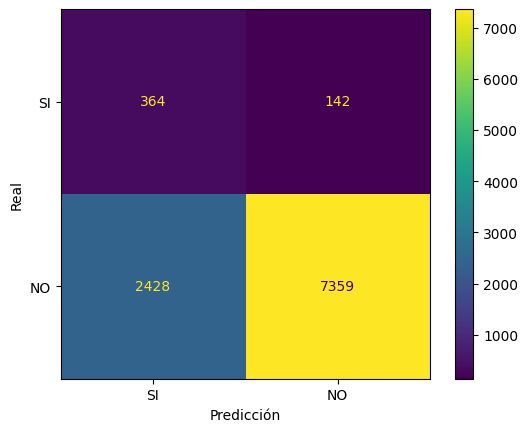

In [20]:
cm = confusion_matrix(Y_validacion['es_popular'].values, df_y_validacion_pred_proba['prediccion'].values, labels=['SI', 'NO'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SI', 'NO'])
disp.plot()
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [21]:
umbral_corte = (0.953)
y_validacion_pred = clf.predict_proba(X_validacion)
df_y_validacion_pred_proba = pd.DataFrame(y_validacion_pred, columns = ['NO_prob', 'SI_prob'])
df_y_validacion_pred_proba['prediccion'] = atu.evaluar_corte(df_y_validacion_pred_proba['NO_prob'].values, umbral_corte, 'SI', 'NO')

metricas = atu.calcular_metricas(
    y_true = Y_validacion['es_popular'].values, 
    y_pred = df_y_validacion_pred_proba['prediccion'].values, 
    labels=['NO', 'SI']
)

parametros = {
    'max_depth': max_depth,
    'umbral_corte': umbral_corte
}

[metricas, parametros]

[{'true negatives': 7359,
  'true positives': 364,
  'false positives': 2428,
  'false negatives': 142,
  'accuracy': 0.7503,
  'recall': 0.7194,
  'precision': 0.1304,
  'specificity': 0.7519,
  'tasa falso positivo': 0.2481,
  'tasa falso negativo': 0.0145,
  'f1': 0.2207,
  'metrica negocio': 1917.7865612648222,
  'metrica optima negocio': 4000.0},
 {'max_depth': 4, 'umbral_corte': 0.953}]

In [22]:
a_mlflow_u.log_experimento(
    host = 'http://localhost:5000', 
    nombre_experimento="AnalisisDeCervezas", 
    run_name="Segunda ejecucion", 
    descripcion="Rpart con umbral de corte modificado", 
    dataset_tag="validacion", 
    parametros=parametros, 
    metricas=metricas,
    model=clf, 
    artifact_path="model"
)

C:\Users\arouiller\AppData\Local\miniconda3\envs\python_3_9_beer_analysis\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### Probemos con el dataset de testing

In [23]:
umbral_corte = (0.953)
y_testing_pred = clf.predict_proba(X_testing)

df_y_testing_pred_proba = pd.DataFrame(y_testing_pred, columns = ['NO_prob', 'SI_prob'])

y_testing_pred = atu.evaluar_corte(df_y_testing_pred_proba['NO_prob'].values, umbral_corte, 'SI', 'NO')

metricas = atu.calcular_metricas(
    y_true = Y_testing['es_popular'].values, 
    y_pred = y_testing_pred, 
    labels=['NO', 'SI']
)

parametros = {
    'max_depth': max_depth,
    'umbral_corte': umbral_corte
}

[metricas, parametros]

[{'true negatives': 10555,
  'true positives': 549,
  'false positives': 3411,
  'false negatives': 189,
  'accuracy': 0.7552,
  'recall': 0.7439,
  'precision': 0.1386,
  'specificity': 0.7558,
  'tasa falso positivo': 0.2442,
  'tasa falso negativo': 0.0135,
  'f1': 0.2337,
  'metrica negocio': 2051.2195121951218,
  'metrica optima negocio': 4000.0},
 {'max_depth': 4, 'umbral_corte': 0.953}]

In [24]:
a_mlflow_u.log_experimento(
    host = 'http://localhost:5000', 
    nombre_experimento="AnalisisDeCervezas", 
    run_name="Segunda ejecucion", 
    descripcion="Rpart con umbral de corte modificado", 
    dataset_tag="testing", 
    parametros=parametros, 
    metricas=metricas,
    model=clf, 
    artifact_path="model"
)